#### Importing required libraries

In [63]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#### Importing the data

In [58]:
mo_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/sukhna_dhanas/train_set_label.csv")
print(mo_data.head(10))

   Solidity  Eccentricity  EquivDiameter   Extrema  FilledArea    Extent  \
0  0.711636      0.673498       0.109069  0.870544    0.010808  0.660599   
1  0.184271      0.865533       0.181675  0.306442    0.021235  0.183804   
2  0.431175      0.679469       0.172644  0.750469    0.020929  0.380940   
3  0.712849      0.991839       0.240241  0.271420    0.036976  0.700643   
4  0.338077      0.996782       0.123578  0.045654    0.011389  0.088682   
5  0.356525      0.950434       0.115916  0.711069    0.010689  0.218164   
6  0.205350      0.918622       0.215054  0.367730    0.034283  0.161805   
7  0.205350      0.918622       0.215054  0.367730    0.034283  0.161805   
8  0.441515      0.905971       0.072388  0.696685    0.005721  0.285169   
9  0.231049      0.704539       0.275388  0.306442    0.050738  0.200059   

   Orientation  EulerNumber  BoundingBox1  BoundingBox2  ...  ConvexHull3  \
0     0.094353     0.987915      0.870476      0.447276  ...     0.877460   
1     0.4

#### Checking the distribution of target variabels

In [60]:
print('1%',round(mo_data['microorganism'].value_counts()[1]/len(mo_data)*100, 2))
print('2%',round(mo_data['microorganism'].value_counts()[2]/len(mo_data)*100, 2))
print('3%',round(mo_data['microorganism'].value_counts()[3]/len(mo_data)*100, 2))
print('4%',round(mo_data['microorganism'].value_counts()[4]/len(mo_data)*100, 2))


1% 25.0
2% 25.0
3% 25.0
4% 25.0


##### By observing above values i can conclude that there no dominance of one catergory over other

#### shape of the data

In [3]:
print('shape of the data',mo_data.shape)

shape of the data (13824, 24)


#### checking the types of data attributes


In [4]:
print(mo_data.dtypes)

Solidity           float64
Eccentricity       float64
EquivDiameter      float64
Extrema            float64
FilledArea         float64
Extent             float64
Orientation        float64
EulerNumber        float64
BoundingBox1       float64
BoundingBox2       float64
BoundingBox3       float64
BoundingBox4       float64
ConvexHull1        float64
ConvexHull2        float64
ConvexHull3        float64
ConvexHull4        float64
MajorAxisLength    float64
MinorAxisLength    float64
Perimeter          float64
ConvexArea         float64
Centroid1          float64
Centroid2          float64
Area               float64
microorganism        int64
dtype: object


#### Checking the null values

In [5]:
mo_data.isnull().sum()

Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
microorganism      0
dtype: int64

#### Descriptive stats of the data

In [6]:
mo_data.describe()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
count,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,...,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000
mean,0.483543,0.816668,0.158836,0.528733,0.027930,0.390554,0.480102,0.967930,0.483085,0.444948,...,0.487924,0.487700,0.082797,0.043939,0.049383,0.012236,0.515745,0.479954,0.048216,2.500000
std,0.209131,0.168313,0.111070,0.238477,0.048621,0.218697,0.310809,0.045840,0.239790,0.227774,...,0.238699,0.239473,0.086908,0.052404,0.068806,0.041491,0.239394,0.224588,0.065958,1.118074
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.298202,0.719613,0.091416,0.352069,0.008160,0.213847,0.165487,0.962403,0.307823,0.266257,...,0.317745,0.311429,0.025956,0.020286,0.011265,0.001776,0.336157,0.314578,0.015655,1.750000
50%,0.466642,0.869592,0.135782,0.524431,0.015266,0.354430,0.522795,0.980866,0.459683,0.449033,...,0.463492,0.462857,0.057924,0.028227,0.026138,0.003972,0.508826,0.462994,0.028598,2.500000
75%,0.669901,0.938896,0.209592,0.715447,0.031614,0.523621,0.752532,0.990260,0.661587,0.590510,...,0.668571,0.673651,0.112127,0.056314,0.057580,0.010660,0.710310,0.658128,0.058514,3.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


#### Detection of outliers

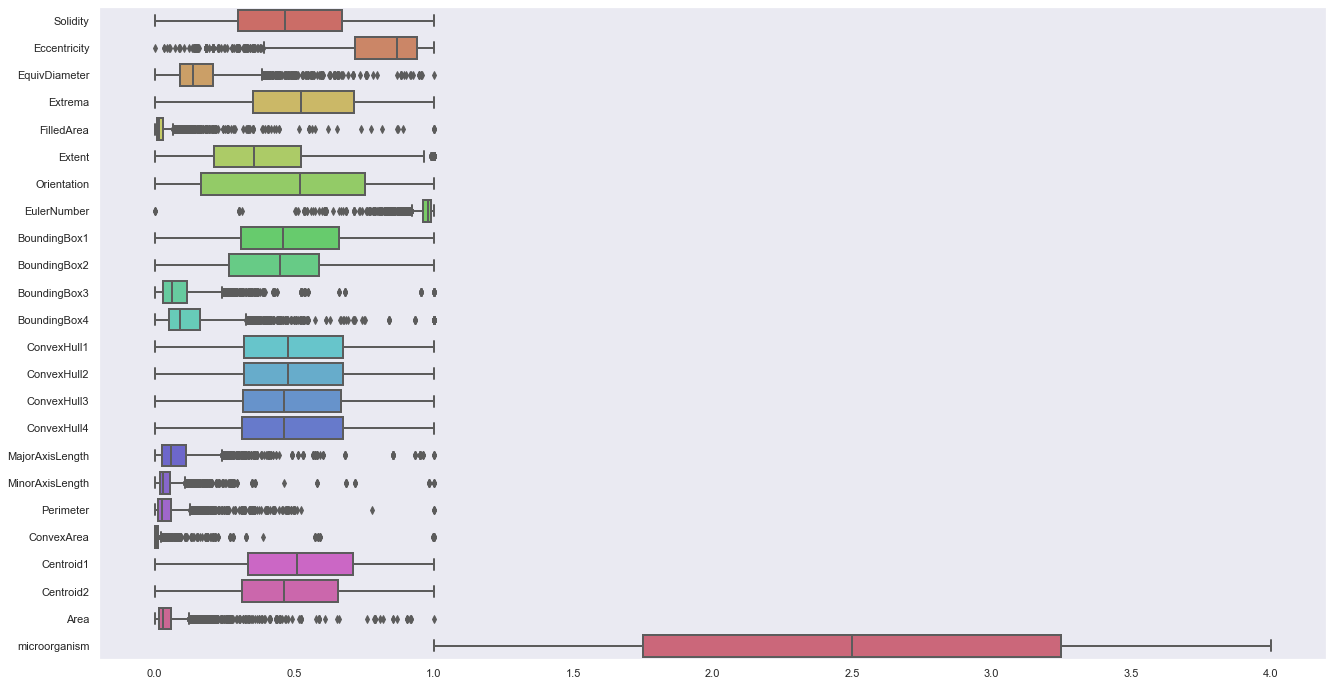

In [7]:
plt.figure(figsize=[22, 12])
sns.set(style='dark')
sns.boxplot(data=mo_data,palette='hls',orient='h', linewidth=2)

#### outliers treatment(replacing outliers)

In [8]:
def replaceoutliers(df, col, method = 'quantile', strategy = 'median'):
    col_data = df[col]
    q1, q2_median, q3 = col_data.quantile([.25, 0.5, 0.75])
    col_mean, col_std = col_data.mean(), col_data.std()
    ## If data is normally distributed method = std and strategy = mean
    ## If data is not normally distributed  method = quantile and strategy = median
    ## Setting outliars boundry using quantile method
    if method == 'quantile':
        IQR = q3 - q1
        upper_limit = q3 + 1.5 * IQR
        lower_limit = q1 - 1.5 * IQR
        
        ## Setting outliars boundries using std method
    elif method =='stddev':
        cutoff = col_std * 2
        lower_limit = col_mean - cutoff
        upper_limit = col_mean + cutoff
    else:
        print('error:please pass the correct method of strategy as a quantile for quantile and stddev for standard deviation')
    
    ## print outliars 
    outliers = df.loc[(col_data < lower_limit)|(col_data > upper_limit),col]
    outlier_density = round(len(outliers)/len(df)*100, 2)
    if len(outliers) == 0:
        print(f'features\'{col}\'does not have any outlier')
    else:
        print(f"total number of outliers are:{len(outliers)}\n")
        print(f"outliers % density:{outlier_density}%\n")
        print(f'outliers for \'{col}\'are :\n{np.sort(np.array(outliers))}\n')
        display(df[(col_data < lower_limit)|(col_data > upper_limit)])
        
    ## Replace outliers with median or mean strategies
    if outlier_density > 2:
        if strategy == 'median':
            df.loc[(col_data < lower_limit)|(col_data > upper_limit),col] = q2_median
        else:
            df.loc[(col_data < lower_limit)|(col_data > upper_limit),col] = col_mean
    elif len(outliers!=0):
        df = df[(col_data > lower_limit)&(col_data < upper_limit)]
    return df
    

In [9]:
for col in list(mo_data.columns):
    mo_data = replaceoutliers(mo_data, col)

features'Solidity'does not have any outlier
total number of outliers are:290

outliers % density:2.1%

outliers for 'Eccentricity'are :
[0.         0.03364738 0.03364738 0.04585943 0.05323176 0.05529574
 0.07425077 0.08689588 0.08689588 0.09106662 0.10613628 0.12449722
 0.13515193 0.13877401 0.1413409  0.14147804 0.14147804 0.14363671
 0.14372436 0.14407663 0.15021412 0.15021412 0.15021412 0.15021412
 0.15021412 0.15021412 0.15021412 0.15021412 0.15021412 0.15021412
 0.15021412 0.15021412 0.15021412 0.15021412 0.15021412 0.15021412
 0.15021412 0.15021412 0.15021412 0.15021412 0.15021412 0.15021412
 0.15021412 0.15021412 0.15021412 0.15021412 0.15021412 0.15021412
 0.15021412 0.15021412 0.15021412 0.15021412 0.15021412 0.15021412
 0.15021412 0.15021412 0.15021412 0.15021412 0.15021412 0.15021412
 0.15021412 0.15021412 0.15021412 0.15021412 0.15021412 0.15021412
 0.15021412 0.15021412 0.15021412 0.15021412 0.15021412 0.15021412
 0.15021412 0.15021412 0.15021412 0.15021412 0.15021412 0.15

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
13,0.406814,0.329818,0.275388,0.452158,0.055195,0.349227,0.676168,0.924136,0.365714,0.825132,...,0.365714,0.365714,0.079904,0.100890,0.086387,0.014969,0.412515,0.890950,0.092880,2
26,0.484824,0.386978,0.200328,0.158100,0.045496,0.429327,0.406958,0.970357,0.112701,0.747679,...,0.122471,0.113903,0.054895,0.069932,0.026638,0.007349,0.143829,0.772400,0.054512,1
71,0.848298,0.182393,0.057969,0.843652,0.004009,0.772414,0.653764,0.986908,0.844444,0.754833,...,0.845714,0.845079,0.006461,0.017612,0.004679,0.000502,0.845869,0.738396,0.008024,1
85,0.800951,0.074251,0.105549,0.924069,0.010356,0.797921,0.236477,0.981704,0.918481,0.146707,...,0.920040,0.919261,0.015031,0.028987,0.010612,0.001477,0.927726,0.143179,0.020946,3
86,0.952502,0.154105,0.141631,0.867417,0.014237,0.935476,0.076766,0.980530,0.857778,0.057996,...,0.859683,0.859048,0.019085,0.033282,0.010625,0.001971,0.869479,0.060065,0.030442,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13621,0.586395,0.135152,0.044457,0.521723,0.002885,0.493669,0.030613,0.990702,0.514623,0.516167,...,0.517226,0.515258,0.008339,0.020257,0.011155,0.000623,0.513043,0.505574,0.005784,1
13631,0.598924,0.150214,0.039779,0.536585,0.002479,0.501838,0.028968,0.990601,0.530794,0.484183,...,0.533333,0.531429,0.006956,0.018428,0.009350,0.000473,0.528250,0.472978,0.004844,1
13642,0.191763,0.319369,0.207019,0.545966,0.026278,0.130276,0.883664,0.953004,0.417143,0.606327,...,0.417143,0.417143,0.095198,0.119074,0.079025,0.019423,0.488740,0.672676,0.056876,2
13677,0.598924,0.150214,0.039779,0.536585,0.002479,0.501838,0.028968,0.990601,0.530794,0.484183,...,0.533333,0.531429,0.006956,0.018428,0.009350,0.000473,0.528250,0.472978,0.004844,1


total number of outliers are:586

outliers % density:4.24%

outliers for 'EquivDiameter'are :
[0.38729165 0.38729165 0.38729165 0.38729165 0.38729165 0.38729165
 0.38729165 0.38729165 0.38729165 0.39080372 0.3921555  0.39297675
 0.39353743 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281
 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281
 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281
 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281
 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281
 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281
 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281
 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281
 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281
 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281
 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281 0.39652281
 0.39652281 0.39652281 0.39652281 0

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
11,0.238998,0.554497,0.502311,0.608505,0.184377,0.214796,0.414210,0.843236,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
29,0.216284,0.940817,0.498926,0.440275,0.167758,0.099277,0.776590,0.811682,0.095873,0.275923,...,0.234921,0.187937,0.310319,0.124009,0.257110,0.080822,0.267022,0.510436,0.270277,2
36,0.226508,0.919736,0.396523,0.821764,0.124955,0.182526,0.625360,0.880161,0.593651,0.130053,...,0.593651,0.594286,0.246947,0.114904,0.258217,0.050894,0.735949,0.224618,0.177666,3
39,0.238998,0.554497,0.502311,0.608505,0.184377,0.214796,0.414210,0.843236,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
91,0.226508,0.919736,0.396523,0.821764,0.124955,0.182526,0.625360,0.880161,0.593651,0.130053,...,0.593651,0.594286,0.246947,0.114904,0.258217,0.050894,0.735949,0.224618,0.177666,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13670,0.475474,0.518976,0.494526,0.502203,0.157946,0.406263,0.671948,0.898849,0.360963,0.634263,...,0.363468,0.362850,0.138566,0.148861,0.102564,0.036919,0.448347,0.746237,0.267920,4
13691,0.237111,0.941759,0.884395,0.759850,1.000000,0.222690,0.056479,0.304129,0.742222,0.000000,...,0.742222,0.915556,0.582999,0.231144,0.357047,0.215740,0.915089,0.381353,0.790885,2
13719,0.238998,0.554497,0.502311,0.608505,0.184377,0.214796,0.414210,0.843236,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
13725,0.238998,0.554497,0.502311,0.608505,0.184377,0.214796,0.414210,0.843236,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3


features'Extrema'does not have any outlier
total number of outliers are:1028

outliers % density:7.44%

outliers for 'FilledArea'are :
[0.06731183 0.06731183 0.06742858 ... 1.         1.         1.        ]



,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
11,0.238998,0.554497,0.135782,0.608505,0.184377,0.214796,0.414210,0.843236,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
19,0.325817,0.863404,0.386374,0.652908,0.099866,0.231502,0.752532,0.911380,0.521270,0.250439,...,0.523175,0.522540,0.180508,0.109580,0.093385,0.033996,0.626050,0.398720,0.169532,4
29,0.216284,0.940817,0.135782,0.440275,0.167758,0.099277,0.776590,0.811682,0.095873,0.275923,...,0.234921,0.187937,0.310319,0.124009,0.257110,0.080822,0.267022,0.510436,0.270277,2
36,0.226508,0.919736,0.135782,0.821764,0.124955,0.182526,0.625360,0.880161,0.593651,0.130053,...,0.593651,0.594286,0.246947,0.114904,0.258217,0.050894,0.735949,0.224618,0.177666,3
39,0.238998,0.554497,0.135782,0.608505,0.184377,0.214796,0.414210,0.843236,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13691,0.237111,0.941759,0.135782,0.759850,1.000000,0.222690,0.056479,0.304129,0.742222,0.000000,...,0.742222,0.915556,0.582999,0.231144,0.357047,0.215740,0.915089,0.381353,0.790885,2
13719,0.238998,0.554497,0.135782,0.608505,0.184377,0.214796,0.414210,0.843236,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
13725,0.238998,0.554497,0.135782,0.608505,0.184377,0.214796,0.414210,0.843236,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
13744,0.475563,0.510339,0.135782,0.503440,0.160574,0.411510,0.671499,0.897281,0.361905,0.635325,...,0.364444,0.363810,0.139147,0.151222,0.103880,0.037520,0.449289,0.749158,0.272291,4


total number of outliers are:150

outliers % density:1.09%

outliers for 'Extent'are :
[0.98980488 0.98980488 0.98980488 0.98980488 0.98980488 0.98980488
 0.98980488 0.98980488 0.98980488 0.98980488 0.98980488 0.98980488
 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111
 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111
 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111
 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111
 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111
 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111
 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111
 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111
 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111
 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111 0.99639111
 0.99639111 0.99639111 1.         1.         1.         1.
 1.         1.         1.         1.         1.   

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
124,1.000000,0.575639,0.054259,0.896185,0.003446,1.000000,0.170800,0.994965,0.902222,0.852373,...,0.903492,0.902857,0.007174,0.013911,0.001566,0.000338,0.902814,0.832647,0.007326,1
155,0.940641,0.422391,0.019421,0.340213,0.000914,0.996391,0.771771,0.999329,0.340317,0.137961,...,0.341587,0.340952,0.000000,0.008310,0.000000,0.000003,0.331284,0.118362,0.002004,1
163,1.000000,0.575639,0.054259,0.896185,0.003446,1.000000,0.170800,0.994965,0.902222,0.852373,...,0.903492,0.902857,0.007174,0.013911,0.001566,0.000338,0.902814,0.832647,0.007326,1
168,1.000000,0.575639,0.054259,0.896185,0.003446,1.000000,0.170800,0.994965,0.902222,0.852373,...,0.903492,0.902857,0.007174,0.013911,0.001566,0.000338,0.902814,0.832647,0.007326,1
245,0.984914,0.869592,0.200733,0.831144,0.026832,0.989805,0.784912,0.945284,0.813333,0.385764,...,0.815873,0.814603,0.031742,0.047929,0.007809,0.003476,0.832218,0.394247,0.053996,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13312,1.000000,0.575639,0.054259,0.896185,0.003446,1.000000,0.170800,0.994965,0.902222,0.852373,...,0.903492,0.902857,0.007174,0.013911,0.001566,0.000338,0.902814,0.832647,0.007326,1
13341,1.000000,0.575639,0.054259,0.896185,0.003446,1.000000,0.170800,0.994965,0.902222,0.852373,...,0.903492,0.902857,0.007174,0.013911,0.001566,0.000338,0.902814,0.832647,0.007326,1
13390,1.000000,0.575639,0.054259,0.896185,0.003446,1.000000,0.170800,0.994965,0.902222,0.852373,...,0.903492,0.902857,0.007174,0.013911,0.001566,0.000338,0.902814,0.832647,0.007326,1
13469,1.000000,0.575639,0.054259,0.896185,0.003446,1.000000,0.170800,0.994965,0.902222,0.852373,...,0.903492,0.902857,0.007174,0.013911,0.001566,0.000338,0.902814,0.832647,0.007326,1


features'Orientation'does not have any outlier
total number of outliers are:1096

outliers % density:8.02%

outliers for 'EulerNumber'are :
[0.         0.         0.         ... 0.92105028 0.92121361 0.92122544]



,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
11,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.843236,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
19,0.325817,0.863404,0.386374,0.652908,0.015266,0.231502,0.752532,0.911380,0.521270,0.250439,...,0.523175,0.522540,0.180508,0.109580,0.093385,0.033996,0.626050,0.398720,0.169532,4
29,0.216284,0.940817,0.135782,0.440275,0.015266,0.099277,0.776590,0.811682,0.095873,0.275923,...,0.234921,0.187937,0.310319,0.124009,0.257110,0.080822,0.267022,0.510436,0.270277,2
36,0.226508,0.919736,0.135782,0.821764,0.015266,0.182526,0.625360,0.880161,0.593651,0.130053,...,0.593651,0.594286,0.246947,0.114904,0.258217,0.050894,0.735949,0.224618,0.177666,3
39,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.843236,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13719,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.843236,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
13725,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.843236,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
13744,0.475563,0.510339,0.135782,0.503440,0.015266,0.411510,0.671499,0.897281,0.361905,0.635325,...,0.364444,0.363810,0.139147,0.151222,0.103880,0.037520,0.449289,0.749158,0.272291,4
13791,0.320602,0.966353,0.207941,0.382114,0.034514,0.172241,0.231726,0.908023,0.370794,0.811951,...,0.370794,0.372063,0.133506,0.039601,0.063606,0.011760,0.411359,0.860279,0.057305,2


features'BoundingBox1'does not have any outlier
features'BoundingBox2'does not have any outlier
total number of outliers are:802

outliers % density:5.87%

outliers for 'BoundingBox3'are :
[0.24984227 0.24984227 0.24984227 0.24984227 0.24984227 0.24984227
 0.24984227 0.25047319 0.25047319 0.25047319 0.25047319 0.25047319
 0.25047319 0.2511041  0.2511041  0.2511041  0.2511041  0.2511041
 0.2511041  0.2511041  0.2511041  0.2511041  0.2511041  0.2511041
 0.2511041  0.2511041  0.2511041  0.2511041  0.2511041  0.25299685
 0.25299685 0.25299685 0.25299685 0.25299685 0.25299685 0.25299685
 0.25299685 0.25299685 0.25299685 0.25299685 0.25299685 0.25425867
 0.25425867 0.25425867 0.25425867 0.25425867 0.25425867 0.25425867
 0.25678233 0.25741325 0.25741325 0.25741325 0.25741325 0.25741325
 0.25741325 0.25741325 0.25741325 0.26119874 0.26119874 0.26119874
 0.26119874 0.26119874 0.26119874 0.26119874 0.26119874 0.26119874
 0.26119874 0.26119874 0.26119874 0.26119874 0.26211392 0.26246057
 0.262460

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
11,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
29,0.216284,0.940817,0.135782,0.440275,0.015266,0.099277,0.776590,0.980866,0.095873,0.275923,...,0.234921,0.187937,0.310319,0.124009,0.257110,0.080822,0.267022,0.510436,0.270277,2
33,0.168408,0.981720,0.219246,0.949969,0.031751,0.050051,0.689358,0.931521,0.673651,0.549209,...,0.673651,0.685079,0.255642,0.056345,0.104026,0.024249,0.796577,0.725174,0.062688,3
36,0.226508,0.919736,0.135782,0.821764,0.015266,0.182526,0.625360,0.980866,0.593651,0.130053,...,0.593651,0.594286,0.246947,0.114904,0.258217,0.050894,0.735949,0.224618,0.177666,3
39,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13691,0.237111,0.941759,0.135782,0.759850,0.015266,0.222690,0.056479,0.980866,0.742222,0.000000,...,0.742222,0.915556,0.582999,0.231144,0.357047,0.215740,0.915089,0.381353,0.790885,2
13719,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
13725,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
13774,0.286839,0.991998,0.244744,0.417761,0.035073,0.083543,0.681494,0.951997,0.163175,0.608963,...,0.167619,0.165079,0.251014,0.036438,0.088916,0.017303,0.261172,0.690109,0.075686,2


total number of outliers are:543

outliers % density:3.97%

outliers for 'BoundingBox4'are :
[0.33164983 0.33164983 0.33164983 0.33164983 0.33164983 0.33164983
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33417508
 0.33417508 0.33417508 0.33417508 0.33417508 0.33417508 0.33417508
 0.33437353 0.33536992 0.33580147 0.33585859 0.33585859 0.33585859
 0.33585859 0.33585859 0.33754209 0.33754209 0.33754209 0.33754209
 0.34090909 0.34090909 0.34090909 0.34090909 0.34090909 0.34090909
 0.34090909 0.34090909 0.34090909 0.34090909 0.34090909 0.34090909
 0.34511784 0.34511784 0.34511784 0.34511784 0.34511784 0.34511784
 0.3476431  0.3476431  0.3476431  0.3476431  0.3476431  0.3476431
 0.34848485 0.34848485 0.34848485 0.34848485 0.34848485 0.34848485
 0.34848485 0.34848485 0.34848485 0.34848485 0.34848485 0.34848485
 0.34848485 0.34848485 0.34848485 0.34848485 0.34848485 0.34848485
 0.34848485 0.34848485 0.34848485 0.34848485 0.34848485 0.34848485
 0.34848485 0.34848485 0.34848485 0.3

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
11,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
29,0.216284,0.940817,0.135782,0.440275,0.015266,0.099277,0.776590,0.980866,0.095873,0.275923,...,0.234921,0.187937,0.310319,0.124009,0.257110,0.080822,0.267022,0.510436,0.270277,2
39,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
48,0.135343,0.922464,0.305949,0.667292,0.053811,0.083130,0.734442,0.980866,0.475556,0.420914,...,0.475556,0.475556,0.299827,0.136981,0.095277,0.052871,0.590705,0.631339,0.111739,2
60,0.048053,0.945100,0.365723,0.760475,0.015266,0.042346,0.023677,0.980866,0.772063,0.000000,...,0.916190,0.916508,0.491825,0.189420,0.262339,0.187818,0.933167,0.426202,0.153564,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13672,0.003424,0.515245,0.366093,0.158224,0.015266,0.004225,0.014644,0.980866,0.044444,0.000000,...,0.044444,0.044762,0.949583,0.984225,0.426195,1.000000,0.557630,0.369395,0.153843,2
13691,0.237111,0.941759,0.135782,0.759850,0.015266,0.222690,0.056479,0.980866,0.742222,0.000000,...,0.742222,0.915556,0.582999,0.231144,0.357047,0.215740,0.915089,0.381353,0.790885,2
13719,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
13725,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3


features'ConvexHull1'does not have any outlier
features'ConvexHull2'does not have any outlier
features'ConvexHull3'does not have any outlier
features'ConvexHull4'does not have any outlier
total number of outliers are:661

outliers % density:4.83%

outliers for 'MajorAxisLength'are :
[0.24694737 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737
 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737
 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737
 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737
 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737
 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737
 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737
 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737
 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737
 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737 0.24694737
 0.24694737 0.24694737 0.24694737 0.24694737 0

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
29,0.216284,0.940817,0.135782,0.440275,0.015266,0.099277,0.776590,0.980866,0.095873,0.275923,...,0.234921,0.187937,0.310319,0.124009,0.257110,0.080822,0.267022,0.510436,0.270277,2
33,0.168408,0.981720,0.219246,0.949969,0.031751,0.050051,0.689358,0.931521,0.673651,0.549209,...,0.673651,0.685079,0.255642,0.056345,0.104026,0.024249,0.796577,0.725174,0.062688,3
36,0.226508,0.919736,0.135782,0.821764,0.015266,0.182526,0.625360,0.980866,0.593651,0.130053,...,0.593651,0.594286,0.246947,0.114904,0.258217,0.050894,0.735949,0.224618,0.177666,3
44,0.168408,0.981720,0.219246,0.949969,0.031751,0.050051,0.689358,0.931521,0.673651,0.549209,...,0.673651,0.685079,0.255642,0.056345,0.104026,0.024249,0.796577,0.725174,0.062688,3
48,0.135343,0.922464,0.305949,0.667292,0.053811,0.083130,0.734442,0.980866,0.475556,0.420914,...,0.475556,0.475556,0.299827,0.136981,0.095277,0.052871,0.590705,0.631339,0.111739,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13672,0.003424,0.515245,0.366093,0.158224,0.015266,0.004225,0.014644,0.980866,0.044444,0.000000,...,0.044444,0.044762,0.949583,0.984225,0.426195,1.000000,0.557630,0.369395,0.153843,2
13691,0.237111,0.941759,0.135782,0.759850,0.015266,0.222690,0.056479,0.980866,0.742222,0.000000,...,0.742222,0.915556,0.582999,0.231144,0.357047,0.215740,0.915089,0.381353,0.790885,2
13774,0.286839,0.991998,0.244744,0.417761,0.035073,0.083543,0.681494,0.951997,0.163175,0.608963,...,0.167619,0.165079,0.251014,0.036438,0.088916,0.017303,0.261172,0.690109,0.075686,2
13813,0.133067,0.921179,0.335708,0.755472,0.063471,0.087241,0.760186,0.980866,0.570159,0.006151,...,0.571429,0.570794,0.320208,0.147438,0.122825,0.063238,0.682309,0.248050,0.131744,2


total number of outliers are:856

outliers % density:6.26%

outliers for 'MinorAxisLength'are :
[0.11051399 0.11053996 0.11057064 0.11059377 0.11061627 0.11063946
 0.11063946 0.11063946 0.11063946 0.11063946 0.11063946 0.11063946
 0.1106973  0.11078887 0.11080651 0.11080651 0.11080651 0.11080651
 0.11080651 0.11080651 0.11092491 0.11092491 0.11092491 0.11183084
 0.11197711 0.11291271 0.11384819 0.11384819 0.11384819 0.11384819
 0.11384819 0.11384819 0.11384819 0.11384819 0.1144226  0.11448884
 0.11448884 0.11448884 0.11448884 0.11448884 0.11448884 0.11448884
 0.11467374 0.11489612 0.11489612 0.11489612 0.11489612 0.11489612
 0.11489612 0.11490352 0.11490352 0.11490352 0.11490352 0.11490352
 0.11490352 0.11490352 0.11490352 0.11490352 0.11490352 0.11490352
 0.11490352 0.11490352 0.11490352 0.11490352 0.11490352 0.11490352
 0.11490352 0.11490352 0.11490352 0.11490352 0.11490352 0.11490352
 0.11490352 0.11490352 0.11490352 0.11490352 0.11490352 0.11490352
 0.11490352 0.11490352 0.11490352

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
11,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
29,0.216284,0.940817,0.135782,0.440275,0.015266,0.099277,0.776590,0.980866,0.095873,0.275923,...,0.234921,0.187937,0.058794,0.124009,0.257110,0.080822,0.267022,0.510436,0.270277,2
36,0.226508,0.919736,0.135782,0.821764,0.015266,0.182526,0.625360,0.980866,0.593651,0.130053,...,0.593651,0.594286,0.058794,0.114904,0.258217,0.050894,0.735949,0.224618,0.177666,3
39,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
48,0.135343,0.922464,0.305949,0.667292,0.053811,0.083130,0.734442,0.980866,0.475556,0.420914,...,0.475556,0.475556,0.058794,0.136981,0.095277,0.052871,0.590705,0.631339,0.111739,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13719,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
13725,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.180470,0.354244,0.074248,0.567158,0.596467,0.273666,3
13744,0.475563,0.510339,0.135782,0.503440,0.015266,0.411510,0.671499,0.980866,0.361905,0.635325,...,0.364444,0.363810,0.139147,0.151222,0.103880,0.037520,0.449289,0.749158,0.272291,4
13752,0.171976,0.629793,0.280907,0.141338,0.015266,0.128112,0.362443,0.945284,0.017778,0.132689,...,0.080635,0.034286,0.134360,0.130569,0.076041,0.036199,0.117754,0.226902,0.096159,3


total number of outliers are:1306

outliers % density:9.55%

outliers for 'Perimeter'are :
[0.12826953 0.12887532 0.12895875 ... 1.         1.         1.        ]



,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
9,0.231049,0.704539,0.275388,0.306442,0.050738,0.200059,0.975842,0.939577,0.241905,0.173989,...,0.246349,0.244444,0.121679,0.107672,0.132394,0.026228,0.280761,0.299189,0.092880,3
11,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.028251,0.354244,0.074248,0.567158,0.596467,0.273666,3
29,0.216284,0.940817,0.135782,0.440275,0.015266,0.099277,0.776590,0.980866,0.095873,0.275923,...,0.234921,0.187937,0.058794,0.028251,0.257110,0.080822,0.267022,0.510436,0.270277,2
36,0.226508,0.919736,0.135782,0.821764,0.015266,0.182526,0.625360,0.980866,0.593651,0.130053,...,0.593651,0.594286,0.058794,0.028251,0.258217,0.050894,0.735949,0.224618,0.177666,3
38,0.231049,0.704539,0.275388,0.306442,0.050738,0.200059,0.975842,0.939577,0.241905,0.173989,...,0.246349,0.244444,0.121679,0.107672,0.132394,0.026228,0.280761,0.299189,0.092880,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13721,0.231049,0.704539,0.275388,0.306442,0.050738,0.200059,0.975842,0.939577,0.241905,0.173989,...,0.246349,0.244444,0.121679,0.107672,0.132394,0.026228,0.280761,0.299189,0.092880,3
13725,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.028251,0.354244,0.074248,0.567158,0.596467,0.273666,3
13784,0.231049,0.704539,0.275388,0.306442,0.050738,0.200059,0.975842,0.939577,0.241905,0.173989,...,0.246349,0.244444,0.121679,0.107672,0.132394,0.026228,0.280761,0.299189,0.092880,3
13786,0.231049,0.704539,0.275388,0.306442,0.050738,0.200059,0.975842,0.939577,0.241905,0.173989,...,0.246349,0.244444,0.121679,0.107672,0.132394,0.026228,0.280761,0.299189,0.092880,3


total number of outliers are:1848

outliers % density:13.51%

outliers for 'ConvexArea'are :
[0.02403064 0.02403092 0.02406714 ... 1.         1.         1.        ]



,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
9,0.231049,0.704539,0.275388,0.306442,0.050738,0.200059,0.975842,0.939577,0.241905,0.173989,...,0.246349,0.244444,0.121679,0.107672,0.026482,0.026228,0.280761,0.299189,0.092880,3
11,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.028251,0.026482,0.074248,0.567158,0.596467,0.273666,3
19,0.325817,0.863404,0.386374,0.652908,0.015266,0.231502,0.752532,0.980866,0.521270,0.250439,...,0.523175,0.522540,0.180508,0.109580,0.093385,0.033996,0.626050,0.398720,0.169532,4
29,0.216284,0.940817,0.135782,0.440275,0.015266,0.099277,0.776590,0.980866,0.095873,0.275923,...,0.234921,0.187937,0.058794,0.028251,0.026482,0.080822,0.267022,0.510436,0.270277,2
33,0.168408,0.981720,0.219246,0.949969,0.031751,0.050051,0.689358,0.931521,0.673651,0.549209,...,0.673651,0.685079,0.058794,0.056345,0.104026,0.024249,0.796577,0.725174,0.062688,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13752,0.171976,0.629793,0.280907,0.141338,0.015266,0.128112,0.362443,0.945284,0.017778,0.132689,...,0.080635,0.034286,0.134360,0.028251,0.076041,0.036199,0.117754,0.226902,0.096159,3
13784,0.231049,0.704539,0.275388,0.306442,0.050738,0.200059,0.975842,0.939577,0.241905,0.173989,...,0.246349,0.244444,0.121679,0.107672,0.026482,0.026228,0.280761,0.299189,0.092880,3
13786,0.231049,0.704539,0.275388,0.306442,0.050738,0.200059,0.975842,0.939577,0.241905,0.173989,...,0.246349,0.244444,0.121679,0.107672,0.026482,0.026228,0.280761,0.299189,0.092880,3
13813,0.133067,0.921179,0.335708,0.755472,0.063471,0.087241,0.760186,0.980866,0.570159,0.006151,...,0.571429,0.570794,0.058794,0.028251,0.122825,0.063238,0.682309,0.248050,0.131744,2


features'Centroid1'does not have any outlier
features'Centroid2'does not have any outlier
total number of outliers are:940

outliers % density:6.87%

outliers for 'Area'are :
[0.12364612 0.12408316 0.12452769 0.1245461  0.12467053 0.12478505
 0.12494307 0.1250694  0.12534473 0.12565414 0.12565414 0.12565414
 0.12565414 0.12565414 0.12565414 0.12565414 0.12565414 0.12567407
 0.12567407 0.12604898 0.1263915  0.12642114 0.127074   0.12816671
 0.1282154  0.1285149  0.1285149  0.1285149  0.1285149  0.1285149
 0.1285149  0.12873593 0.12905345 0.12949174 0.12994298 0.1300453
 0.13102929 0.13128252 0.13155506 0.13174447 0.13174447 0.13174447
 0.13174447 0.13174447 0.13174447 0.13174447 0.13184067 0.13190331
 0.13265205 0.13277115 0.13277115 0.13277115 0.13277115 0.13277115
 0.13277115 0.13303905 0.13318671 0.13354864 0.13354864 0.13354864
 0.13354864 0.13354864 0.13357854 0.13364363 0.13375646 0.13383761
 0.13498624 0.13516342 0.13516342 0.13534061 0.13592475 0.13614897
 0.13626722 0.13674561 

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
11,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.028251,0.026482,0.004028,0.567158,0.596467,0.273666,3
19,0.325817,0.863404,0.386374,0.652908,0.015266,0.231502,0.752532,0.980866,0.521270,0.250439,...,0.523175,0.522540,0.180508,0.109580,0.093385,0.004028,0.626050,0.398720,0.169532,4
29,0.216284,0.940817,0.135782,0.440275,0.015266,0.099277,0.776590,0.980866,0.095873,0.275923,...,0.234921,0.187937,0.058794,0.028251,0.026482,0.004028,0.267022,0.510436,0.270277,2
36,0.226508,0.919736,0.135782,0.821764,0.015266,0.182526,0.625360,0.980866,0.593651,0.130053,...,0.593651,0.594286,0.058794,0.028251,0.026482,0.004028,0.735949,0.224618,0.177666,3
39,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.028251,0.026482,0.004028,0.567158,0.596467,0.273666,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13691,0.237111,0.941759,0.135782,0.759850,0.015266,0.222690,0.056479,0.980866,0.742222,0.000000,...,0.742222,0.915556,0.058794,0.028251,0.026482,0.004028,0.915089,0.381353,0.790885,2
13719,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.028251,0.026482,0.004028,0.567158,0.596467,0.273666,3
13725,0.238998,0.554497,0.135782,0.608505,0.015266,0.214796,0.414210,0.980866,0.437460,0.429701,...,0.437460,0.437460,0.174050,0.028251,0.026482,0.004028,0.567158,0.596467,0.273666,3
13744,0.475563,0.510339,0.135782,0.503440,0.015266,0.411510,0.671499,0.980866,0.361905,0.635325,...,0.364444,0.363810,0.139147,0.028251,0.103880,0.004028,0.449289,0.749158,0.272291,4


features'microorganism'does not have any outlier


In [10]:
corr = mo_data.corr()
round(corr, 2)

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
Solidity,1.00,-0.19,-0.32,0.19,-0.29,0.90,-0.19,0.42,0.32,0.03,...,0.31,0.31,-0.56,-0.47,-0.58,-0.46,0.22,-0.12,-0.30,0.20
Eccentricity,-0.19,1.00,0.15,-0.08,0.14,-0.38,0.04,-0.14,-0.11,0.04,...,-0.10,-0.10,0.33,-0.07,0.19,0.18,-0.08,0.08,0.16,0.14
EquivDiameter,-0.32,0.15,1.00,0.04,0.83,-0.36,0.18,-0.75,-0.08,-0.11,...,-0.08,-0.07,0.72,0.76,0.65,0.61,0.02,0.04,0.86,0.44
Extrema,0.19,-0.08,0.04,1.00,-0.01,0.19,-0.00,-0.06,0.96,-0.04,...,0.96,0.96,-0.10,-0.02,-0.05,-0.10,0.98,-0.04,-0.00,0.13
FilledArea,-0.29,0.14,0.83,-0.01,1.00,-0.31,0.16,-0.76,-0.12,-0.11,...,-0.11,-0.11,0.62,0.67,0.54,0.57,-0.04,0.02,0.93,0.36
Extent,0.90,-0.38,-0.36,0.19,-0.31,1.00,-0.20,0.40,0.32,0.00,...,0.31,0.31,-0.60,-0.38,-0.56,-0.46,0.22,-0.14,-0.34,0.07
Orientation,-0.19,0.04,0.18,-0.00,0.16,-0.20,1.00,-0.17,-0.10,-0.16,...,-0.10,-0.10,0.15,0.24,0.19,0.12,-0.08,-0.14,0.16,0.04
EulerNumber,0.42,-0.14,-0.75,-0.06,-0.76,0.40,-0.17,1.00,0.05,0.06,...,0.05,0.04,-0.60,-0.68,-0.64,-0.60,-0.03,-0.07,-0.79,-0.22
BoundingBox1,0.32,-0.11,-0.08,0.96,-0.12,0.32,-0.10,0.05,1.00,-0.00,...,1.00,1.00,-0.22,-0.12,-0.16,-0.16,0.98,-0.04,-0.12,0.08
BoundingBox2,0.03,0.04,-0.11,-0.04,-0.11,0.00,-0.16,0.06,-0.00,1.00,...,-0.01,-0.01,-0.03,-0.07,-0.01,-0.03,-0.03,0.97,-0.12,0.02


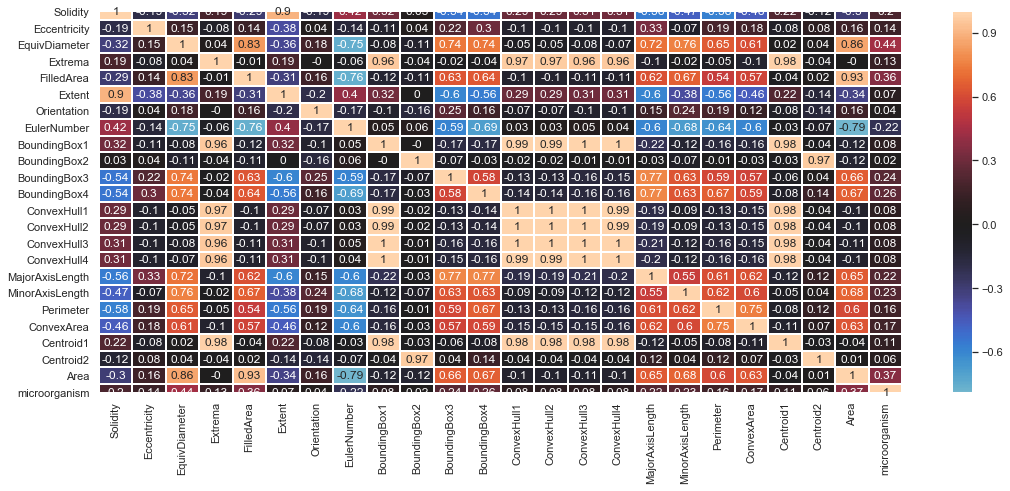

In [11]:
plt.figure(figsize=(18,7))
sns.heatmap(round(corr,2), center=0, annot=True, linewidths=1)

In [12]:
corr_new = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_new = corr_new.unstack().transpose().sort_values(ascending=False).dropna()

In [26]:
corr_new = corr_new[(corr_new > 0.6)|(corr_new < -0.6)]
corr_new

ConvexHull2   ConvexHull1      1.000000
ConvexHull3   BoundingBox1     0.998469
ConvexHull4   ConvexHull3      0.998355
              BoundingBox1     0.998327
ConvexHull3   ConvexHull1      0.995275
              ConvexHull2      0.995275
ConvexHull2   BoundingBox1     0.994121
ConvexHull1   BoundingBox1     0.994121
ConvexHull4   ConvexHull1      0.993255
              ConvexHull2      0.993255
Centroid1     ConvexHull4      0.983234
              ConvexHull2      0.982766
              ConvexHull1      0.982766
              ConvexHull3      0.982167
              BoundingBox1     0.982122
              Extrema          0.981734
Centroid2     BoundingBox2     0.967349
ConvexHull2   Extrema          0.966276
ConvexHull1   Extrema          0.966276
ConvexHull4   Extrema          0.964539
ConvexHull3   Extrema          0.963072
BoundingBox1  Extrema          0.962282
Area          FilledArea       0.926829
Extent        Solidity         0.897096
Area          EquivDiameter    0.860562


In [17]:
mo_data.shape

(13674, 24)

#### Splitting the data

In [65]:
#independent variabels
X = mo_data.iloc[:,:-1]
X.head()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area
0,0.711636,0.673498,0.109069,0.870544,0.010808,0.660599,0.094353,0.987915,0.870476,0.447276,...,0.875395,0.877460,0.871746,0.025669,0.028256,0.010776,0.001776,0.878873,0.453973,0.020195
1,0.184271,0.865533,0.181675,0.306442,0.021235,0.183804,0.484926,0.974488,0.284444,0.345343,...,0.304870,0.295238,0.290794,0.128062,0.077815,0.044747,0.016309,0.325508,0.360384,0.045702
2,0.431175,0.679469,0.172644,0.750469,0.020929,0.380940,0.891717,0.946626,0.707302,0.227592,...,0.728653,0.729524,0.723810,0.065495,0.062696,0.049242,0.006400,0.739531,0.255860,0.042004
3,0.712849,0.991839,0.240241,0.271420,0.036976,0.700643,0.016835,0.975159,0.268571,0.468366,...,0.270715,0.269841,0.268571,0.146561,0.020286,0.035455,0.006678,0.267614,0.568813,0.073303
4,0.338077,0.996782,0.123578,0.045654,0.011389,0.088682,0.219150,0.982544,0.041905,0.630931,...,0.041746,0.041905,0.041905,0.134704,0.011038,0.034491,0.004833,0.071762,0.699979,0.024521


In [66]:
#dependent variabels
Y = mo_data.iloc[:,-1]
Y.head()

0    1
1    2
2    2
3    4
4    2
Name: microorganism, dtype: int64

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1)

#### as we can see the data is already scaled so there is no need to scale it again

In [72]:
rc = RandomForestClassifier()
rc.fit(X_train, Y_train)
predictions = rc.predict(X_test)
accuracy_score(predictions, Y_test)

C:\Users\Krishna Vamshi\New folder\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9848156182212582

#### Test data

In [71]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/sukhna_dhanas/test_set_label.csv')
test_data.head()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area
0,0.226508,0.919736,0.396523,0.821764,0.124955,0.182526,0.625360,0.880161,0.593651,0.130053,...,0.592030,0.593651,0.594286,0.246947,0.114904,0.258217,0.050894,0.735949,0.224618,0.177666
1,0.131249,0.839202,0.189765,0.779862,0.024801,0.102111,0.903063,0.930178,0.697143,0.148506,...,0.755218,0.698413,0.697143,0.168388,0.110807,0.086619,0.024327,0.782927,0.277804,0.049141
2,0.356525,0.950434,0.115916,0.711069,0.010689,0.218164,0.860724,0.969789,0.674286,0.324253,...,0.719165,0.679365,0.676190,0.077268,0.027995,0.023458,0.004147,0.683484,0.365322,0.022188
3,0.338935,0.828545,0.029171,0.450281,0.001548,0.256960,0.188719,0.995300,0.440635,0.533392,...,0.452245,0.451429,0.448889,0.020454,0.016625,0.010399,0.000735,0.439275,0.530411,0.003269
4,0.532809,0.747284,0.139494,0.813557,0.019737,0.485427,0.205856,0.973289,0.805078,0.815014,...,0.806157,0.806001,0.805078,0.042423,0.038444,0.019337,0.003800,0.825515,0.826488,0.031852


In [73]:
test_data.shape

(3456, 23)

In [76]:
predictions = rc.predict(test_data)
print(predictions)


[3 2 2 ... 4 2 1]


In [78]:
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results_lack.csv")

### prediction_accuracy_score = 98.92%